In [24]:
# %pip install osmx osmnx
import osmnx as ox
import geopandas as gpd
from shapely.geometry import LineString, Point
import pandas as pd
from shapely.ops import split

In [25]:
latitude = 52.69238
longitude = 16.78041
radius = 3000  # Buffer radius in meters
# Step 2: Fetch forest polygons

forest_tags = {"landuse": "forest", "natural": "wood"}  # Forest-related tags
forest_gdf = ox.features.features_from_point((latitude, longitude), tags=forest_tags, dist=radius)

pavement_tags = {"highway": ["footway", "track", "path", "cycleway"]}
pavements_gdf = ox.features.features_from_point((latitude, longitude), tags=pavement_tags, dist=radius)


In [26]:
pavements_gdf['highway'].value_counts()

highway
track       133
path         25
footway       2
cycleway      1
Name: count, dtype: int64

In [27]:
forest_gdf = forest_gdf.to_crs(epsg=4326)
pavements_gdf = pavements_gdf.to_crs(epsg=4326)

In [28]:
pavements_in_forests = gpd.sjoin(pavements_gdf, forest_gdf, how="inner", op="intersects")

/Users/samuel/Documents/planet-on-2024/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

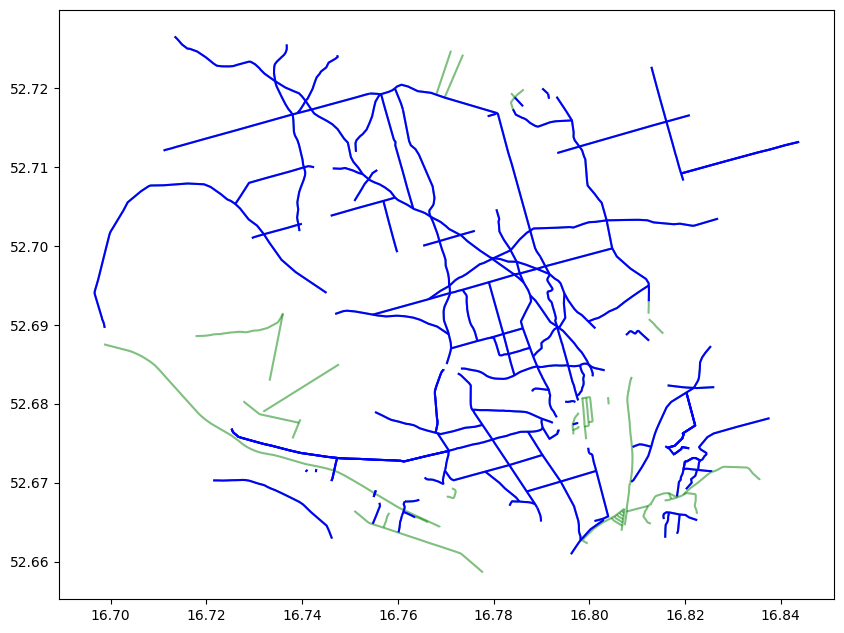

In [6]:
ax = pavements_gdf.plot(color="green", alpha=0.5, figsize=(10, 10), edgecolor="darkgreen")
pavements_in_forests.plot(ax=ax, color="blue", edgecolor="blue")

In [7]:
pavements_gdf = pavements_gdf.explode(index_parts=True)

In [ ]:
pavements_gdf = pavements_gdf[pavements_gdf.geometry.type == "LineString"]  # Filter LineStrings only

In [8]:
list(pavements_gdf.iloc[0].geometry.coords)

[(16.794616, 52.6942747),
 (16.7948176, 52.6939463),
 (16.7956077, 52.6930875),
 (16.7968823, 52.6919928),
 (16.7975305, 52.6915822),
 (16.7984627, 52.6912114),
 (16.7994256, 52.6906367)]

In [9]:
start_points = pavements_gdf.geometry.apply(lambda geom: Point(geom.coords[0]))
end_points = pavements_gdf.geometry.apply(lambda geom: Point(geom.coords[-1]))

In [10]:
nodes_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(pd.concat([start_points, end_points])).drop_duplicates())
nodes_gdf = nodes_gdf.reset_index(drop=True)

In [11]:
# Add x and y columns (longitude and latitude)
nodes_gdf["x"] = nodes_gdf.geometry.x
nodes_gdf["y"] = nodes_gdf.geometry.y

# Assign a unique ID to each node
nodes_gdf["node_id"] = nodes_gdf.index

In [12]:
pavements_gdf

highway  \
element_type osmid                  
way          158195144  0   track   
             158195169  0   track   
             158195190  0   track   
             158195202  0   track   
             158195225  0   track   
...                           ...   
             1331288829 0   track   
             1331288830 0    path   
             1331288831 0   track   
             1331288832 0   track   
             1331288847 0   track   

                                                                       nodes  \
element_type osmid                                                             
way          158195144  0  [1704257876, 1704257874, 1704257741, 170425774...   
             158195169  0  [1704257832, 9688634527, 1704257837, 170425786...   
             158195190  0  [2964357940, 2964357939, 2964357938, 296435793...   
             158195202  0  [1704257943, 12317850181, 1704257952, 51945663...   
             158195225  0  [1704257832, 4290713425, 4290713426, 170425807...   
...                                                                      ...   
             1331288829 0  [12317850199, 12317850200, 12317850201, 123178...   
             1331288830 0  [12317850212, 12317850213, 12317850214, 123178...   
             1331288831 0  [12317850202, 12317850210, 12317850211, 123178...   
             1331288832 0  [12317850212, 12317850222, 12317850223, 123178...   
             1331288847 0             [1704258000, 12317850294, 12317850295]   

                                         source surface tracktype  \
element_type osmid                                                  
way          158195144  0  European Urban Atlas  ground    grade3   
             158195169  0  European Urban Atlas     NaN       NaN   
             158195190  0  European Urban Atlas     NaN    grade2   
             158195202  0  European Urban Atlas     NaN       NaN   
             158195225  0  European Urban Atlas    sand       NaN   
...                                         ...     ...       ...   
             1331288829 0                   NaN     NaN       NaN   
             1331288830 0                   NaN  ground       NaN   
             1331288831 0                   NaN     NaN       NaN   
             1331288832 0                   NaN     NaN       NaN   
             1331288847 0                   NaN     NaN       NaN   

                          unsigned_ref foot horse segregated bicycle  \
element_type osmid                                                     
way          158195144  0          NaN  NaN   NaN        NaN     NaN   
             158195169  0          NaN  NaN   NaN        NaN     NaN   
             158195190  0          NaN  NaN   NaN        NaN     NaN   
             158195202  0          NaN  NaN   NaN        NaN     NaN   
             158195225  0       2058 P  NaN   NaN        NaN     NaN   
...                                ...  ...   ...        ...     ...   
             1331288829 0          NaN  NaN   NaN        NaN     NaN   
             1331288830 0          NaN  NaN   NaN        NaN     NaN   
             1331288831 0          NaN  NaN   NaN        NaN     NaN   
             1331288832 0          NaN  NaN   NaN        NaN     NaN   
             1331288847 0          NaN  NaN   NaN        NaN     NaN   

                                                                    geometry  
element_type osmid                                                            
way          158195144  0  LINESTRING (16.79462 52.69427, 16.79482 52.693...  
             158195169  0  LINESTRING (16.79988 52.68496, 16.79957 52.685...  
             158195190  0  LINESTRING (16.81296 52.67453, 16.81223 52.674...  
             158195202  0  LINESTRING (16.79937 52.67549, 16.79935 52.675...  
             158195225  0  LINESTRING (16.79988 52.68496, 16.79944 52.685...  
...                                                                      ...  
             1331288829 0  LINESTRIN

In [13]:
nodes_gdf

,geometry,x,y,node_id
0,POINT (16.79462 52.69427),16.794616,52.694275,0
1,POINT (16.79988 52.68496),16.799880,52.684957,1
2,POINT (16.81296 52.67453),16.812959,52.674535,2
3,POINT (16.79937 52.67549),16.799370,52.675491,3
4,POINT (16.78912 52.66684),16.789116,52.666837,4
...,...,...,...,...
257,POINT (16.80675 52.66389),16.806749,52.663891,257
258,POINT (16.79784 52.67715),16.797837,52.677149,258
259,POINT (16.79776 52.67885),16.797759,52.678846,259
260,POINT (16.79769 52.67754),16.797693,52.677539,260


In [14]:
def map_point_to_node_id(point, nodes):
    return nodes[nodes.geometry == point].iloc[0]["node_id"]

pavements_gdf["u"] = pavements_gdf.geometry.apply(lambda geom: map_point_to_node_id(Point(geom.coords[0]), nodes_gdf))
pavements_gdf["v"] = pavements_gdf.geometry.apply(lambda geom: map_point_to_node_id(Point(geom.coords[-1]), nodes_gdf))


In [ ]:
G = ox.utils_graph.graph_from_gdfs(nodes_gdf, pavements_gdf)

In [ ]:
# adjacency matrix
import networkx as nx
A = nx.adjacency_matrix(G).todense()


In [ ]:
# sum of rows in A
G.nodes

In [ ]:
# show adjacency matrix
# import networkx as nx
# adj = nx.adjacency_matrix(G).todense()


In [ ]:
# Step 6: Visualization (optional)
ox.plot_graph(G, node_color="red", edge_color="blue", figsize=(10, 10))

In [43]:
# extract one linestring
line = pavements_gdf.iloc[0].geometry

In [44]:
print(line.coords[:])

[(16.794616, 52.6942747), (16.7948176, 52.6939463), (16.7956077, 52.6930875), (16.7968823, 52.6919928), (16.7975305, 52.6915822), (16.7984627, 52.6912114), (16.7994256, 52.6906367)]


/Users/samuel/Documents/planet-on-2024/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

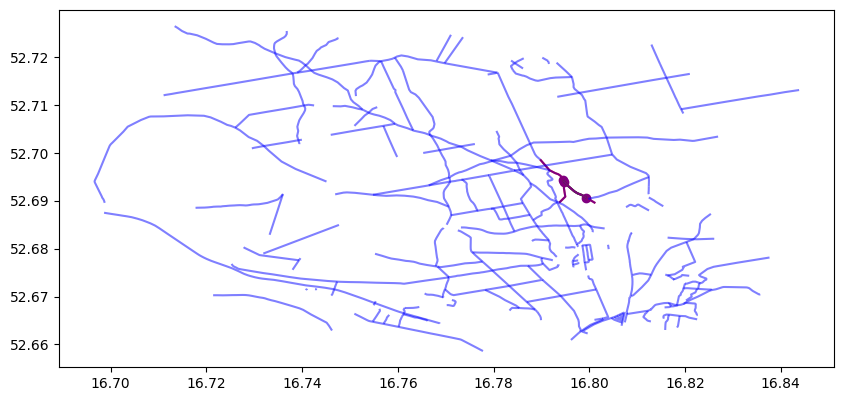

In [45]:
# find intersecting linestrings
intersections = pavements_gdf[pavements_gdf.intersects(line)]

intersections['point'] = intersections.apply(lambda row: line.intersection(row.geometry), axis=1)
# plot intersection points with lines
ax = intersections.plot(color="red", figsize=(10, 10))

pavements_gdf.plot(ax=ax, color="blue", alpha=0.5)

# plot line as green
gpd.GeoSeries([line]).plot(ax=ax, color="green")
intersections['point'].plot(ax=ax, color="purple")

In [46]:
intersections

highway  \
element_type osmid                 
way          158195144 0   track   
             290888258 0   track   
             522846834 0   track   
             522846842 0   track   

                                                                      nodes  \
element_type osmid                                                            
way          158195144 0  [1704257876, 1704257874, 1704257741, 170425774...   
             290888258 0  [1704257876, 2943844619, 2943844620, 294384462...   
             522846834 0   [1704257867, 1704257869, 1704257871, 1704257874]   
             522846842 0               [5091399356, 5091399317, 5289588950]   

                                        source          surface tracktype  \
element_type osmid                                                          
way          158195144 0  European Urban Atlas           ground    grade3   
             290888258 0                   NaN              NaN       NaN   
             522846834 0  European Urban Atlas  concrete:plates    grade1   
             522846842 0  European Urban Atlas           ground    grade3   

                         unsigned_ref bicycle foot segregated smoothness  \
element_type osmid                                                         
way          158195144 0          NaN     NaN  NaN        NaN        NaN   
             290888258 0          NaN     NaN  NaN        NaN        NaN   
             522846834 0          NaN     NaN  NaN        NaN        NaN   
             522846842 0          NaN     NaN  NaN        NaN        NaN   

                         motor_vehicle access footway name horse  \
element_type osmid                                                 
way          158195144 0           NaN    NaN     NaN  NaN   NaN   
             290888258 0           NaN    NaN     NaN  NaN   NaN   
             522846834 0           NaN    NaN     NaN  NaN   NaN   
             522846842 0           NaN    NaN     NaN  NaN   NaN   

                                                                   geometry  \
element_type osmid                                                            
way          158195144 0  LINESTRING (16.79462 52.69427, 16.79482 52.693...   
             290888258 0  LINESTRING (16.79462 52.69427, 16.79401 52.695...   
             522846834 0  LINESTRING (16.79373 52.68962, 16.79500 52.690...   
             522846842 0  LINESTRING (16.79943 52.69064, 16.79981 52.690...   

                           u    v  \
element_type osmid                  
way          158195144 0   0   54   
             290888258 0   0   11   
             522846834 0  52  182   
             522846842 0  54  184   

                                                                      point  
element_type osmid                                                           
way          158195144 0  MULTILINESTRING ((16.79462 52.69427, 16.79482 ...  
             290888258 0                          POINT (16.79462 52.69427)  
             522846834 0                          POINT (16.79482 52.69395)  
             522846842 0                          POINT (16.79943 52.69064)